<a href="https://colab.research.google.com/github/EricCallaway/COSC_5313_CNN_model_HW-5/blob/main/ML_Assignment_03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
from sklearn import metrics





In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/MyDrive/Data/ML_HW#3_Dataset/CNN_dataset/'
train_folder = dataset_path + 'Training/'
test_folder = dataset_path + 'Test/'

In [4]:
for category in os.listdir(train_folder):
  print(category)

Basset
Afghan_hound
Beagle
Black-and-tan_coonhound
Blenheim_spaniel
Bloodhound
Bluetick
Borzoi
Chihuahua
English_foxhound
Irish_wolfhound
Japanese_spaniel
Maltese_dog
papillon
Pekinese
Redbone
Rhodesian_ridgeback
Shih-Tzu
Toy_terrier
Walker_hound


In [5]:
for category in os.listdir(test_folder):
  print(category)

Afghan_hound
Basset
Beagle
Black-and-tan_coonhound
Blenheim_spaniel
Bluetick
Bloodhound
Borzoi
Chihuahua
English_foxhound
Irish_wolfhound
Japanese_spaniel
Maltese_dog
papillon
Pekinese
Redbone
Rhodesian_ridgeback
Shih-Tzu
Toy_terrier
Walker_hound


Defining Batch Size, Height, and Width

In [6]:
batch_size = 32
HEIGHT = 180
WIDTH = 180

Defining validation split of 80/20. (80 - Training, 20 - Validation)

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="training",
  seed=1337,
  image_size=(HEIGHT, WIDTH),
  batch_size=batch_size)

Found 2633 files belonging to 20 classes.
Using 2107 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(HEIGHT, WIDTH),
  batch_size=batch_size)

Found 2633 files belonging to 20 classes.
Using 526 files for validation.


TypeError: ignored

Creating Test Dataset.

First make a list of all the images in the dataset.
Then convert that list into a numpy array.

In [26]:
x_test = []
for folder in os.listdir(test_folder):
  sub_path = test_folder + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_test.append(img_arr)

In [27]:
print(len(x_test))

985


In [28]:
test_x = np.array(x_test)
test_x = test_x/255.0

In [44]:
test_x.shape


(985, 180, 180, 3)

Compute labels of corresponding datasets using ImgageDataGenerator. We use this because our images are stored in folders. We must walk through the folders and find out the corresoponding labels of images stored here.

In [53]:
test_datagen = ImageDataGenerator(rescale = 1./255)

channels_last


Afghan_hound
Basset
Beagle
Black-and-tan_coonhound
Blenheim_spaniel
Bluetick
Bloodhound
Borzoi
Chihuahua
English_foxhound
Irish_wolfhound
Japanese_spaniel
Maltese_dog
papillon
Pekinese
Redbone
Rhodesian_ridgeback
Shih-Tzu
Toy_terrier
Walker_hound

In [62]:
test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (HEIGHT, WIDTH),
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            # classes={'Afghan Hound': 0, 'Basset' : 1,  'Beagle': 2, 'Black and Tan Coonhound': 3, 
                                            #          'Blenheim Spaniel': 4, 'Bloodhound' : 5, 'Bluetick' : 6, 'Borzoi' : 7,
                                            #          'Chihuahua' : 8,  'English Foxhound' : 9, 'Irish_wolfhound' : 10,
                                            #          'Japanese Spaniel' : 11, 'Maltese Dog' : 12, 'Papillon' : 13, 'Pekinese' : 14, 'Redbone' : 15, 
                                            #          'Rhodesian Ridgeback' : 16, 'Shih-Tzu' : 17, 'Toy_terrier' : 18, 'Walker_hound' : 19 }
                                            )

Found 985 images belonging to 20 classes.


In [64]:
test_y = test_set.classes

In [65]:
test_set.class_indices

{'Afghan_hound': 0,
 'Basset': 1,
 'Beagle': 2,
 'Black-and-tan_coonhound': 3,
 'Blenheim_spaniel': 4,
 'Bloodhound': 5,
 'Bluetick': 6,
 'Borzoi': 7,
 'Chihuahua': 8,
 'English_foxhound': 9,
 'Irish_wolfhound': 10,
 'Japanese_spaniel': 11,
 'Maltese_dog': 12,
 'Pekinese': 13,
 'Redbone': 14,
 'Rhodesian_ridgeback': 15,
 'Shih-Tzu': 16,
 'Toy_terrier': 17,
 'Walker_hound': 18,
 'papillon': 19}

In [42]:
test_y.shape

(600,)

In [9]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'Basset', 'Beagle', 'Black-and-tan_coonhound', 'Blenheim_spaniel', 'Bloodhound', 'Bluetick', 'Borzoi', 'Chihuahua', 'English_foxhound', 'Irish_wolfhound', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Redbone', 'Rhodesian_ridgeback', 'Shih-Tzu', 'Toy_terrier', 'Walker_hound', 'papillon']


Visualizing the first nine images of the dataset.

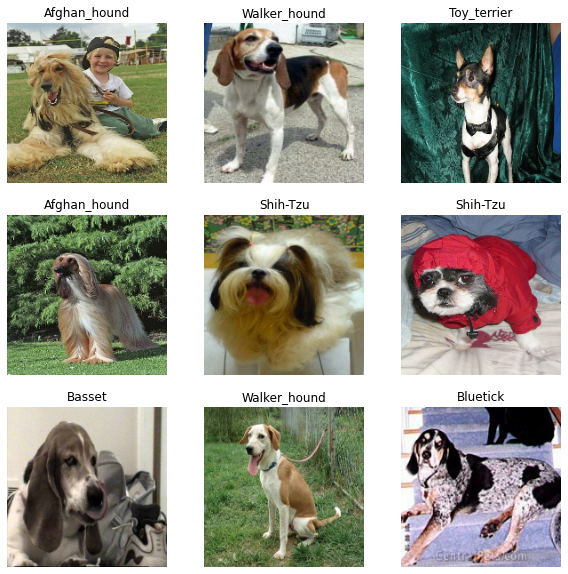

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Below shows the shape of the Tensors. The `imgage_batch` shape is a batch of 32 images, with a shape of `180x180x3` (height, width, #of channels) The number of channels is 3 because they are RGB value images. 

Note: There is an option here to call `.numpy()` to convert the tensors into a `numpy.ndarray`

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Standardizing the Data.

Since our images are in RGB format, they are on the scale of [0,255]. This is not ideal for a neural network, so we will standardize the values in a range of [0,1]

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Here we are caching and prefetching batches in order to fully utilize our CPU and GPU. This will help reduce the amount of time it takes to train the model.

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Training the model.

In [15]:
num_classes = 20

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Define optimization for the model

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Fit the model

In [17]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
66/66 [==============================] - 195s 3s/step - loss: 3.0036 - accuracy: 0.0736 - val_loss: 2.9675 - val_accuracy: 0.0627
Epoch 2/10
66/66 [==============================] - 72s 1s/step - loss: 2.9039 - accuracy: 0.1068 - val_loss: 2.8319 - val_accuracy: 0.1483
Epoch 3/10
66/66 [==============================] - 72s 1s/step - loss: 2.5965 - accuracy: 0.2098 - val_loss: 2.6274 - val_accuracy: 0.2072
Epoch 4/10
66/66 [==============================] - 72s 1s/step - loss: 2.2555 - accuracy: 0.3090 - val_loss: 2.6516 - val_accuracy: 0.2186
Epoch 5/10
66/66 [==============================] - 73s 1s/step - loss: 1.7755 - accuracy: 0.4537 - val_loss: 2.9880 - val_accuracy: 0.2148
Epoch 6/10
66/66 [==============================] - 73s 1s/step - loss: 1.3544 - accuracy: 0.5790 - val_loss: 3.7208 - val_accuracy: 0.1920
Epoch 7/10
66/66 [==============================] - 73s 1s/step - loss: 0.9931 - accuracy: 0.6858 - val_loss: 4.3110 - val_accuracy: 0.1521
Epoch 8/10
66/66 [=

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

Visualizing Loss and Accuracy


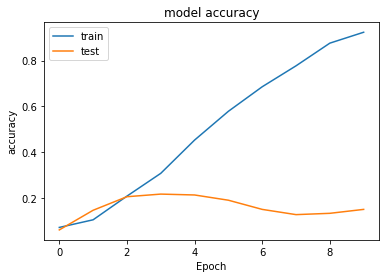

In [20]:
#Summarizing History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

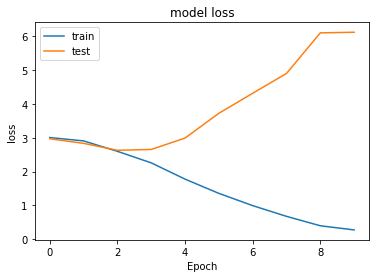

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
print(history.history.keys())
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


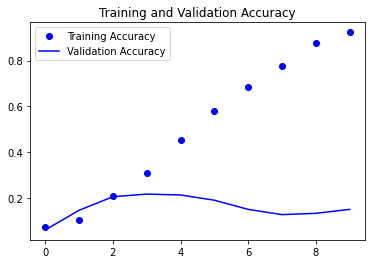

In [68]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

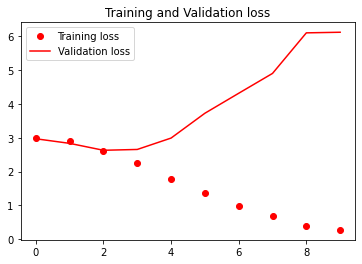

In [69]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

Evaluate the Model

In [66]:
score = model.evaluate(test_x, test_y)
print('Test Accuracy {}'.format(score[1]))

31/31 [==============================] - 8s 262ms/step - loss: 6.2413 - accuracy: 0.0538
Test Accuracy 0.053807105869054794


In [70]:
predicted_classes = model.predict(test_x)
y_true = test_y

Print Confusion Matrix

In [71]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

Creating a dataframe of the predicted values. Also, here I'm creating a list of prediction that the model made by returning the column id of the max element in each row. This will return the class id of the predicted label by the model.

In [75]:
pred_df = pd.DataFrame(predicted_classes, columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
class_predictions = pred_df.idxmax(axis=1)

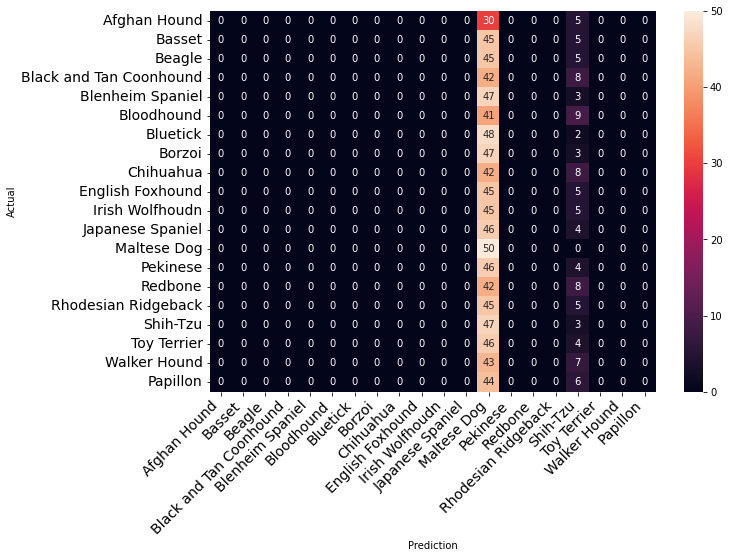

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, class_predictions)
print_confusion_matrix(cm, ["Afghan Hound", "Basset", "Beagle", "Black and Tan Coonhound", "Blenheim Spaniel", "Bloodhound", "Bluetick", "Borzoi", "Chihuahua", "English Foxhound",
                            "Irish Wolfhoudn", "Japanese Spaniel", "Maltese Dog", "Pekinese", "Redbone", "Rhodesian Ridgeback", "Shih-Tzu", "Toy Terrier", "Walker Hound", "Papillon"])

Precision, Recall F1 Scores. As well as the Macro, Micro and Weighted average scores of the F1 Scores.

In [79]:
cr = classification_report(y_true, class_predictions,target_names=["Afghan Hound", "Basset", "Beagle", "Black and Tan Coonhound", "Blenheim Spaniel", "Bloodhound", "Bluetick", "Borzoi", "Chihuahua", "English Foxhound",
                            "Irish Wolfhoudn", "Japanese Spaniel", "Maltese Dog", "Pekinese", "Redbone", "Rhodesian Ridgeback", "Shih-Tzu", "Toy Terrier", "Walker Hound", "Papillon"], digits=3)
print(cr)

                         precision    recall  f1-score   support

           Afghan Hound      0.000     0.000     0.000        35
                 Basset      0.000     0.000     0.000        50
                 Beagle      0.000     0.000     0.000        50
Black and Tan Coonhound      0.000     0.000     0.000        50
       Blenheim Spaniel      0.000     0.000     0.000        50
             Bloodhound      0.000     0.000     0.000        50
               Bluetick      0.000     0.000     0.000        50
                 Borzoi      0.000     0.000     0.000        50
              Chihuahua      0.000     0.000     0.000        50
       English Foxhound      0.000     0.000     0.000        50
        Irish Wolfhoudn      0.000     0.000     0.000        50
       Japanese Spaniel      0.000     0.000     0.000        50
            Maltese Dog      0.056     1.000     0.107        50
               Pekinese      0.000     0.000     0.000        50
                Redbone 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Print Results

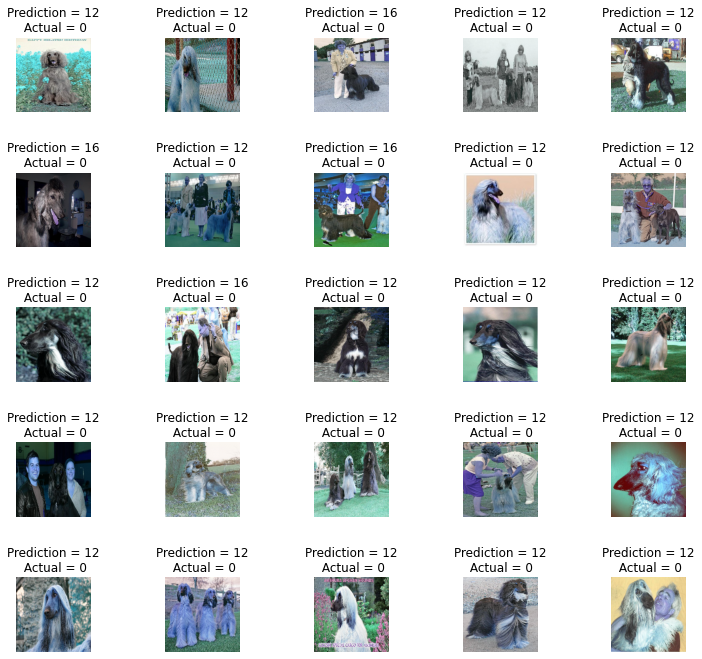

In [80]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(test_x[i])
    axes[i].set_title('Prediction = {}\n Actual = {}'.format(class_predictions[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  